In [40]:
import os
import requests
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [41]:
from web3 import Web3, HTTPProvider
ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
web3 = Web3(HTTPProvider(f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}"))

In [4]:
api = "https://api.thegraph.com/subgraphs/name/convex-community/volume-mainnet-staging"

In [5]:
pool_addr = "0xd51a44d3fae010294c616388b506acda1bfaae46"

In [31]:
query = f'''
{{
  swapEvents (
    first: 1000,
    orderBy: timestamp,
    orderDirection: desc,
    where: {{pool: "{pool_addr.lower()}"}}
  ) {{
 	id
 	timestamp
 	block
    pool {{
      address
      name
    }}
    buyer
    tokenSold
    tokenBought
    amountSold
    amountSoldUSD
    amountBought
    amountBoughtUSD
    gasUsed
    gasLimit
  }}
}}
'''
r = requests.post(api, json={'query': query})
data = dict(r.json())["data"]["swapEvents"]

In [63]:
swaps_dict = []
for i in data:
    swaps_dict.append(
        {
            "tx_hash": i["id"].split('-')[0],
            "timestamp": datetime.datetime.fromtimestamp(int(i['timestamp'])),
            "block": int(i["block"]),
            "pool_addr": i["pool"]["address"],
            "pool_name": i["pool"]["name"],
            "buyer": i["buyer"],
            "token_sold": i["tokenSold"],
            "token_bought": i["tokenBought"],
            "amount_sold": float(i["amountSold"]),
            "amount_bought": float(i["amountBought"]),
            "amount_sold_usd": float(i["amountSoldUSD"]),
            "amount_bought_usd": float(i["amountBoughtUSD"]),
            "gas_used": float(i["gasUsed"]),
            "gas_limit": float(i["gasLimit"])
        }
    )
df_swaps = pd.DataFrame(swaps_dict)
df_swaps.set_index("timestamp", inplace=True)

In [64]:
df_swaps

,tx_hash,block,pool_addr,pool_name,buyer,token_sold,token_bought,amount_sold,amount_bought,amount_sold_usd,amount_bought_usd,gas_used,gas_limit
timestamp,,,,,,,,,,,,,
2022-06-07 10:51:40,0x4e05d0240a2d0b632a2e98f872c407caf7841b9c8172...,14919931,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,5.679741,168183.588087,168218.552252,168183.588087,1414832.0,2010773.0
2022-06-07 10:50:53,0x397f34e8aa43f3c6f9723e2dce51b1c5f7381a4cd4a2...,14919924,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0xdac17f958d2ee523a2206206994597c13d831ec7,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,67270.091031,2.264741,67270.091031,67075.486414,695517.0,1011466.0
2022-06-07 10:48:06,0x6edd126d00c7ab2aad9bf3d6a687ce41a3e1540d072a...,14919913,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,1.772245,52512.640155,52489.107598,52512.640155,1206229.0,1713422.0
2022-06-07 10:46:52,0x69a1103a948a1ece0e15094e933fe5a272947ac4777a...,14919910,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,11.858116,20999.715924,20877.014816,20999.715924,606087.0,865329.0
2022-06-07 10:46:52,0x5b0e15b71debcb200f72acd5e0907b1f649d4956fab7...,14919910,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,3.205954,95108.847007,94951.681833,95108.847007,1442737.0,2026418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 20:32:42,0x2489bc865b7eefb9f4143659e3c8402c78b8278ca415...,14898675,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0xbeefbabeea323f07c59926295205d3b7a17e8638,0xdac17f958d2ee523a2206206994597c13d831ec7,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,114314.200000,65.248816,114314.200000,114403.750413,352025.0,700000.0
2022-06-03 20:18:27,0x2514746f552fbb4a815ea0c1e6604e1ed4ec037c2699...,14898600,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x2d35ce0cabf4ac263eab1c182a454c91cc155cc1,0xdac17f958d2ee523a2206206994597c13d831ec7,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,147342.926000,4.992342,147342.926000,147026.986533,377680.0,431406.0
2022-06-03 20:11:23,0xc840b89e5bc8d71ca6366af4f8558fa3074e85e0ca60...,14898579,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x000000000dfde7deaf24138722987c9a6991e2d4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,85.966920,150144.862194,150729.755211,150144.862194,285123.0,750000.0


In [65]:
def is_contract(addr: str) -> bool:
    return len(web3.eth.get_code(Web3.toChecksumAddress(addr))) > 0

In [66]:
df_swaps['buyer_is_contract'] = [is_contract(i) for i in df_swaps.buyer.values]
df_swaps

,tx_hash,block,pool_addr,pool_name,buyer,token_sold,token_bought,amount_sold,amount_bought,amount_sold_usd,amount_bought_usd,gas_used,gas_limit,buyer_is_contract
timestamp,,,,,,,,,,,,,,
2022-06-07 10:51:40,0x4e05d0240a2d0b632a2e98f872c407caf7841b9c8172...,14919931,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,5.679741,168183.588087,168218.552252,168183.588087,1414832.0,2010773.0,True
2022-06-07 10:50:53,0x397f34e8aa43f3c6f9723e2dce51b1c5f7381a4cd4a2...,14919924,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0xdac17f958d2ee523a2206206994597c13d831ec7,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,67270.091031,2.264741,67270.091031,67075.486414,695517.0,1011466.0,True
2022-06-07 10:48:06,0x6edd126d00c7ab2aad9bf3d6a687ce41a3e1540d072a...,14919913,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,1.772245,52512.640155,52489.107598,52512.640155,1206229.0,1713422.0,True
2022-06-07 10:46:52,0x69a1103a948a1ece0e15094e933fe5a272947ac4777a...,14919910,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,11.858116,20999.715924,20877.014816,20999.715924,606087.0,865329.0,True
2022-06-07 10:46:52,0x5b0e15b71debcb200f72acd5e0907b1f649d4956fab7...,14919910,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,3.205954,95108.847007,94951.681833,95108.847007,1442737.0,2026418.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 20:32:42,0x2489bc865b7eefb9f4143659e3c8402c78b8278ca415...,14898675,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0xbeefbabeea323f07c59926295205d3b7a17e8638,0xdac17f958d2ee523a2206206994597c13d831ec7,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,114314.200000,65.248816,114314.200000,114403.750413,352025.0,700000.0,True
2022-06-03 20:18:27,0x2514746f552fbb4a815ea0c1e6604e1ed4ec037c2699...,14898600,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x2d35ce0cabf4ac263eab1c182a454c91cc155cc1,0xdac17f958d2ee523a2206206994597c13d831ec7,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,147342.926000,4.992342,147342.926000,147026.986533,377680.0,431406.0,True
2022-06-03 20:11:23,0xc840b89e5bc8d71ca6366af4f8558fa3074e85e0ca60...,14898579,0xd51a44d3fae010294c616388b506acda1bfaae46,Curve.fi USD-BTC-ETH,0x000000000dfde7deaf24138722987c9a6991e2d4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,85.966920,150144.862194,150729.755211,150144.862194,285123.0,750000.0,True


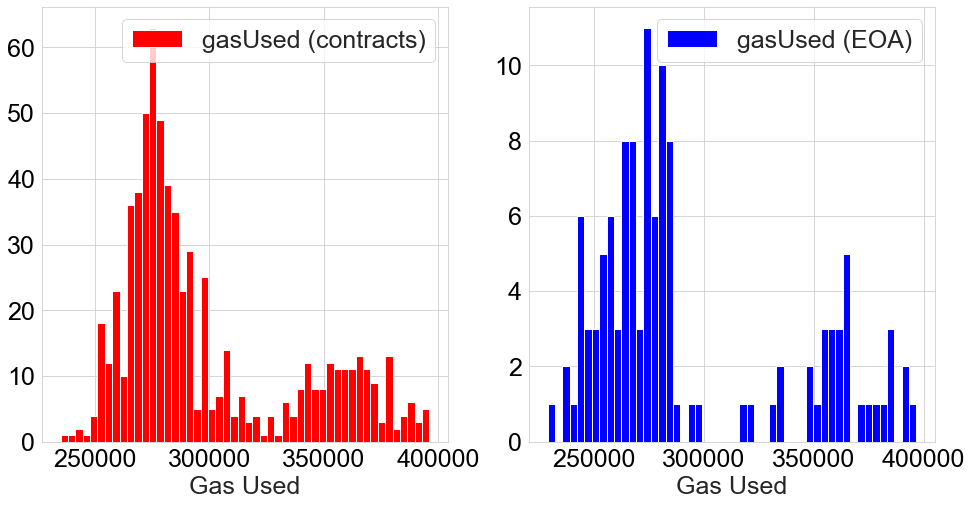

In [73]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))

max_eoa_gas_used = df_swaps[~df_swaps.buyer_is_contract].gas_used.max()

axes[0].hist(
    df_swaps.loc[(df_swaps.buyer_is_contract) & (df_swaps.gas_used < max_eoa_gas_used)].gas_used,
    bins=50,
    color='red',
    label='gasUsed (contracts)',
)
axes[1].hist(
    df_swaps[~df_swaps.buyer_is_contract].gas_used,
    bins=50,
    color='blue',
    label='gasUsed (EOA)',
)

for ax in axes:
    ax.set_xlabel("Gas Used", fontsize=25)
    ax.set_ylabel("", fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.legend(fontsize=25)

There seems to be a bimodal gaussian distribution of gasUsed.